> Explore Dataset

In [ ]:
# import starter libraries
import pandas as pd # data preprocessing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical DV
from sklearn.impute import SimpleImputer # missing value imputation
from sklearn.preprocessing import StandardScaler, MinMaxScaler # feature scaling

In [ ]:
# import train and test datasets
train_set = pd.read_csv('/content/train.csv')
test_set = pd.read_csv('/content/test.csv')

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [ ]:
pd.set_option('display.max_columns', None)
train_set.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,1.0,0385,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,1.0,0906 0352 0371 0446 1822 0344 0416 0417,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,2.0,0329 1202,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,1.0,0329 1300,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,1.0,0416 0945 1822 0400 0417 0344,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [ ]:
pp_train = train_set.copy()

In [ ]:
# Since Cross_Street, Weapon_Used_Code, and Weapon_Description are a majority of null values, we will remove them from the dataset
cols_to_drop = ['Cross_Street', 'Weapon_Used_Code', 'Weapon_Description']
pp_train.drop(columns = cols_to_drop, inplace = True)

In [ ]:
pp_train['Date_Reported'] = pd.to_datetime(pp_train['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
pp_train['Date_Occurred'] = pd.to_datetime(pp_train['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')

pp_train['Reported_Month'] = pp_train['Date_Reported'].dt.month
pp_train['Reported_Day'] = pp_train['Date_Reported'].dt.day
pp_train['Reported_Weekday'] = pp_train['Date_Reported'].dt.weekday

pp_train['Occurred_Month'] = pp_train['Date_Occurred'].dt.month
pp_train['Occurred_Day'] = pp_train['Date_Occurred'].dt.day
pp_train['Occurred_Weekday'] = pp_train['Date_Occurred'].dt.weekday

pp_train.drop(columns=['Date_Reported', 'Date_Occurred'], inplace=True)

In [ ]:
pp_train.drop(columns = ['Location', 'Latitude', 'Longitude','Premise_Description','Status_Description'], inplace = True)

In [ ]:
print(pp_train.isnull().sum())

Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi           2741
Victim_Age                  0
Victim_Sex               2624
Victim_Descent           2624
Premise_Code                0
Status                      0
Crime_Category              0
Reported_Month              0
Reported_Day                0
Reported_Weekday            0
Occurred_Month              0
Occurred_Day                0
Occurred_Weekday            0
dtype: int64


In [ ]:
#Let us address the remaining missing values before we proceed to preprocessing (Modus_Operandi = 2741, Victim_Sex = 2624, Victim_Descent = 2624)
#Filling Modus_Operandi nulls with empty strings, Victim_Sex and Victim_Descent with 'X'
pp_train['Modus_Operandi'] = pp_train['Modus_Operandi'].fillna('')
pp_train['Victim_Sex'] = pp_train['Victim_Sex'].fillna('X')
pp_train['Victim_Descent'] = pp_train['Victim_Descent'].fillna('X')

In [ ]:
pp_train.drop(columns = ['Area_Name'], inplace = True)

In [ ]:
# 3 types of encoding for the categorical cols
# LabelEncoder: 'Area_ID', 'Reporting_District_No', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Status'
# Binarizer: 'Part 1-2'
# MultiLabelBinarizer: 'Modus_Operandi'
# Separating target variable to create a saved encoder to decode the values after prediction
x_train = pp_train.drop(columns = ['Crime_Category'])
y_train = pp_train['Crime_Category']

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, Binarizer, MultiLabelBinarizer, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
#Column_Seperation
cat_label_encoder = ['Area_ID', 'Reporting_District_no', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Status']
cat_binarizer = ['Part 1-2']
num_standardize = ['Time_Occurred', 'Victim_Age', 'Reported_Month', 'Reported_Day', 'Reported_Weekday', 'Occurred_Month',
       'Occurred_Day', 'Occurred_Weekday']

In [ ]:
# Helper function for Modus_Operandi
def fit_mlb(x):
  mlb = MultiLabelBinarizer()
  exploded = x['Modus_Operandi'].explode()
  mlb.fit(exploded)
  return mlb

def transform_mlb(x, mlb):
  exploded = x['Modus_Operandi'].explode()
  transformed = mlb.transform(exploded)
  return pd.DataFrame(transformed, columns=mlb.classes_).groupby(level=0).max().reset_index(drop=True)

x_train['Modus_Operandi'] = x_train['Modus_Operandi'].apply(lambda x: [set(x.split())] if isinstance (x,str) else [set()])

In [ ]:
# Fitting and transforming mlb for training set
mlb = fit_mlb(x_train)
x_train_mlb = transform_mlb(x_train, mlb)
x_train = x_train.drop(columns=['Modus_Operandi']).reset_index(drop=True)
x_train = pd.concat([x_train, x_train_mlb], axis=1)

In [ ]:
# Create Pipelines for cat features encoding
cat_label_encoder_pipe = Pipeline(steps = [
    ('label_encoder', FunctionTransformer(lambda x: x.apply(LabelEncoder().fit_transform)))
])
cat_binarizer_pipe = Pipeline(steps = [
    ('binarizer', Binarizer(threshold = 1))
])
num_standardize_pipe = Pipeline(steps = [
    ('scaler', MinMaxScaler())
])

In [ ]:
# Seperate target variable encoder
target_encoder = LabelEncoder()

In [ ]:
# Column Transformer
preprocessor = ColumnTransformer(
    transformers = [
        ('label_encode', cat_label_encoder_pipe, cat_label_encoder),
        ('binarize', cat_binarizer_pipe, cat_binarizer),
        ('standardize', num_standardize_pipe, num_standardize)
    ],
    remainder = 'passthrough'
)

In [ ]:
x_train.head()

,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Status,Reported_Month,Reported_Day,Reported_Weekday,Occurred_Month,Occurred_Day,Occurred_Weekday,0100,0104,0105,0110,0112,0113,0114,0115,0117,0120,0121,0200,0201,0202,0206,0207,0209,0210,0211,0212,0213,0216,0217,0220,0301,0302,0303,0304,0305,0307,0308,0309,0310,0311,0312,0314,0315,0316,0319,0321,0322,0323,0324,0325,0326,0327,0328,0329,0330,0332,0334,0335,0336,0337,0338,0339,0340,0341,0342,0343,0344,0345,0346,0347,0349,0350,0351,0352,0353,0354,0355,0356,0357,0358,0359,0360,0361,0362,0363,0364,0365,0366,0368,0369,0370,0371,0372,0373,0374,0375,0377,0378,0379,0380,0381,0382,0383,0384,0385,0386,0387,0388,0389,0390,0391,0392,0394,0395,0396,0397,0398,0399,0400,0401,0402,0404,0405,0406,0407,0408,0409,0410,0411,0413,0414,0416,0417,0418,0419,0420,0421,0422,0424,0425,0426,0429,0430,0431,0432,0433,0434,0437,0440,0442,0443,0444,0445,0446,0447,0448,0449,0450,0451,0500,0501,0503,0505,0507,0508,0509,0510,0512,0513,0514,0515,0516,0519,0520,0522,0525,0526,0527,0528,0529,0531,0532,0533,0534,0536,0537,0538,0541,0542,0543,0544,0545,0547,0549,0550,0551,0552,0553,0554,0555,0556,0557,0558,0559,0561,0562,0601,0602,0603,0604,0605,0701,0800,0850,0851,0853,0855,0856,0857,0858,0859,0902,0903,0906,0907,0908,0910,0911,0912,0913,0914,0915,0916,0917,0919,0922,0923,0924,0925,0926,0927,0928,0929,0930,0931,0933,0935,0938,0940,0942,0944,0945,0946,0947,1000,1006,1008,1009,1012,1013,1017,1018,1019,1020,1021,1022,1026,1028,1100,1202,1203,1204,1205,1206,1210,1211,1212,1213,1214,1215,1216,1218,1219,1221,1222,1223,1224,1225,1227,1229,1230,1232,1233,1234,1236,1237,1238,1239,1240,1241,1242,1243,1245,1248,1251,1252,1253,1254,1256,1257,1258,1259,1260,1261,1262,1265,1266,1267,1268,1270,1271,1273,1274,1275,1276,1277,1278,1279,1281,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1315,1316,1317,1318,1401,1402,1403,1404,1405,1406,1407,1408,1409,1410,1411,1413,1414,1415,1416,1419,1420,1501,1510,1512,1513,1514,1516,1517,1519,1520,1522,1528,1531,1536,1538,1601,1602,1604,1605,1606,1607,1608,1609,1610,1611,1612,1701,1702,1801,1802,1803,1804,1805,1807,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1900,1901,1902,1903,1906,1908,1910,1912,1913,1914,1915,1916,2000,2001,2002,2003,2004,2005,2006,2007,2009,2011,2013,2014,2018,2019,2020,2021,2022,2023,2024,2025,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2040,2041,2042,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2058,2059,2060,2104,2108,2126,2157,2201,2204,2303,2304,3003,3004,4025,9999
0,1800.0,15.0,1563.0,1.0,75.0,M,W,101.0,IC,3,9,0,3,6,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1345.0,13.0,1367.0,1.0,41.0,M,H,216.0,IC,2,27,3,2,27,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
y_e = target_encoder.fit_transform(y_train)
x_e = preprocessor.fit_transform(x_train)

In [ ]:
# Preprocessing the test set
test = test_set.copy()

cols_to_drop = ['Cross_Street', 'Weapon_Used_Code', 'Weapon_Description']
test.drop(columns = cols_to_drop, inplace = True)

test['Date_Reported'] = pd.to_datetime(test['Date_Reported'], format='%m/%d/%Y %I:%M:%S %p')
test['Date_Occurred'] = pd.to_datetime(test['Date_Occurred'], format='%m/%d/%Y %I:%M:%S %p')

test['Reported_Month'] = test['Date_Reported'].dt.month
test['Reported_Day'] = test['Date_Reported'].dt.day
test['Reported_Weekday'] = test['Date_Reported'].dt.weekday

test['Occurred_Month'] = test['Date_Occurred'].dt.month
test['Occurred_Day'] = test['Date_Occurred'].dt.day
test['Occurred_Weekday'] = test['Date_Occurred'].dt.weekday

test.drop(columns=['Date_Reported', 'Date_Occurred'], inplace=True)

test.drop(columns = ['Location', 'Latitude', 'Longitude','Premise_Description','Status_Description'], inplace = True)

test['Modus_Operandi'] = test['Modus_Operandi'].fillna('')
test['Victim_Sex'] = test['Victim_Sex'].fillna('X')
test['Victim_Descent'] = test['Victim_Descent'].fillna('X')

test.drop(columns = ['Area_Name'], inplace = True)

cat_label_encoder = ['Area_ID', 'Reporting_District_no', 'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Status']
cat_binarizer = ['Part 1-2']
cat_multilabel_encoder = ['Modus_Operandi']
num_standardize = ['Time_Occurred', 'Victim_Age', 'Reported_Month', 'Reported_Day', 'Reported_Weekday', 'Occurred_Month',
       'Occurred_Day', 'Occurred_Weekday']

In [ ]:
test['Modus_Operandi'] = test['Modus_Operandi'].apply(lambda x: [set(x.split())] if isinstance (x,str) else [set()])
test_mlb = transform_mlb(test, mlb)
test = test.drop(columns=['Modus_Operandi']).reset_index(drop=True)
test = pd.concat([test, test_mlb], axis=1)
test_e = preprocessor.transform(test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:900: UserWarning: unknown class(es) ['0218', '0306', '0320', '0393', '0403', '0518', '0540', '0854', '1011', '1231', '1255', '1314', '2026', '2043', '2044', '2208', '2308', '3030'] will be ignored
  warnings.warn(


In [ ]:
test_e.shape

(5000, 496)

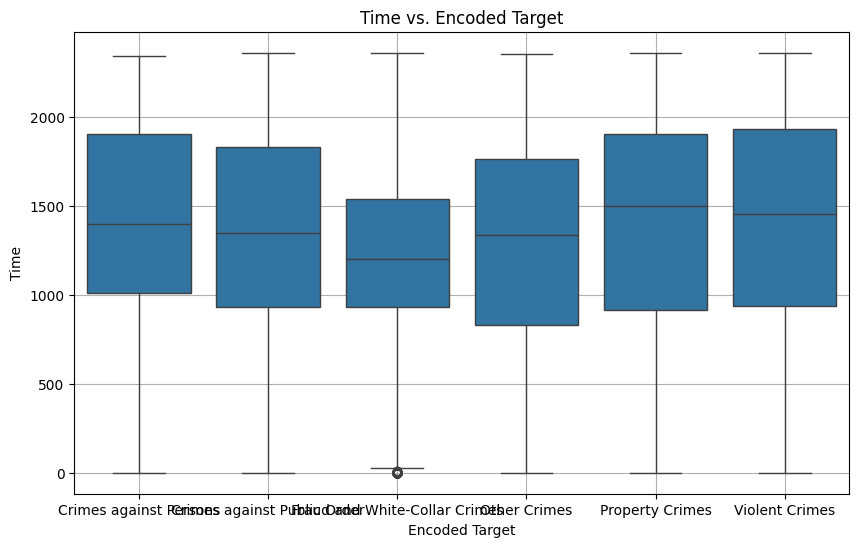

In [ ]:
 time_v_crime = pd.DataFrame({
    'Encoded_Target': y_e,
    'Time Occurred': pp_train['Time_Occurred']
})

plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Encoded_Target', y = 'Time Occurred', data = time_v_crime)
plt.title('Time vs. Encoded Target')
plt.xlabel('Encoded Target')
plt.ylabel('Time')
plt.xticks(ticks=range(len(target_encoder.classes_)), labels=target_encoder.classes_)
plt.grid(True)
plt.show()

In [ ]:
# Splitting training data into train and val data
x_t, x_v, y_t, y_v = train_test_split(x_e, y_e, test_size = 0.2, random_state = 42)

In [ ]:
# With the nature of the data (multiple cat and num cols) and the target variable (mutlilabel classification)
# Let us start with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RandomForest Classifier

In [ ]:
base_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
base_model.fit(x_t, y_t)
y_p1 = base_model.predict(x_v)

acc1 = accuracy_score(y_v, y_p1)
print(f'Base model Accuracy: {acc1:.4f}')

Base model Accuracy: 0.9413


In [ ]:
# Let us see how the base rfc classifier model performs on the test set.
y_p1_t = base_model.predict(test_e)

In [ ]:
# Decoding and downloading predictions to check score
d_y_p1_t = target_encoder.inverse_transform(y_p1_t)
print(d_y_p1_t[:10])

['Violent Crimes' 'Property Crimes' 'Fraud and White-Collar Crimes'
 'Property Crimes' 'Crimes against Public Order' 'Violent Crimes'
 'Violent Crimes' 'Violent Crimes' 'Property Crimes' 'Violent Crimes']


Downloading test predictions to check actual score

In [ ]:
base_rfc_file = pd.DataFrame({'Crime_Category': d_y_p1_t})
base_rfc_file['ID'] = range(1, len(base_rfc_file) + 1)
base_rfc_file.to_csv('base_rfc_pred2.csv', index = False)

In [ ]:
# Let us calculate some data analysis to better understand and tweak the base model
# Let us start with performance metrics and feature importance
from sklearn.metrics import confusion_matrix, classification_report #S ummary of prediction results and reports for each class
from sklearn.metrics import roc_curve, roc_auc_score # Measure the performance at various threshold settings
from sklearn.preprocessing import label_binarize # Convert categorical labels to binary labels

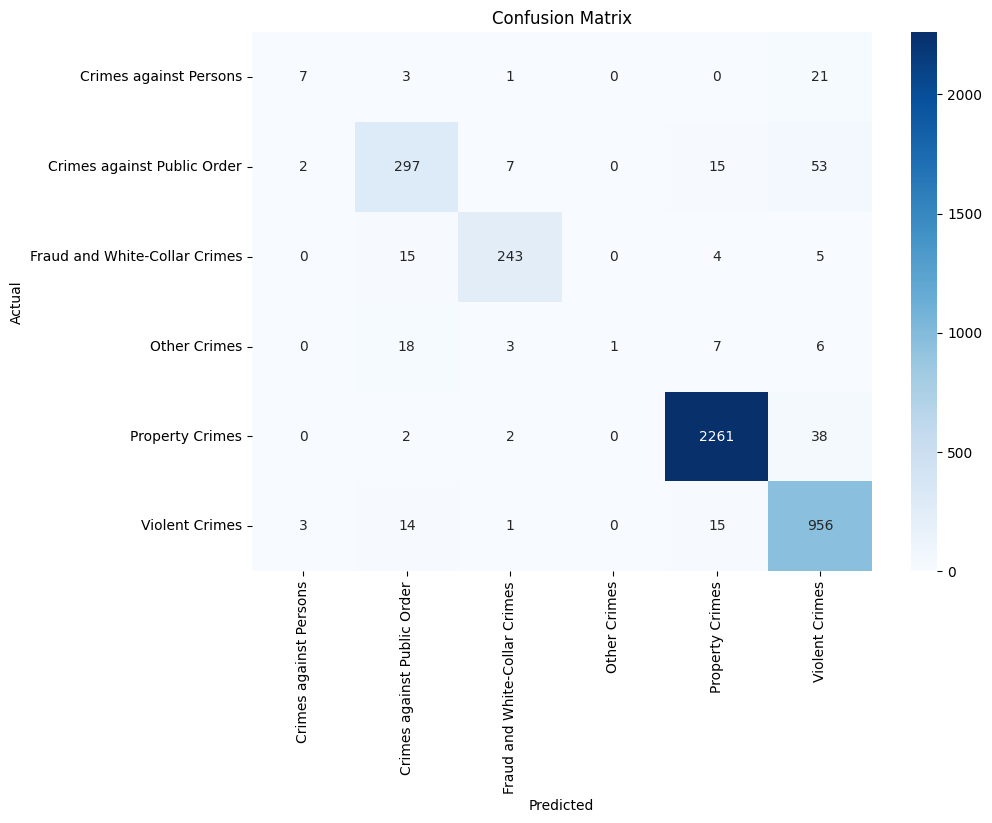

                               precision    recall  f1-score   support

       Crimes against Persons       0.58      0.22      0.32        32
  Crimes against Public Order       0.85      0.79      0.82       374
Fraud and White-Collar Crimes       0.95      0.91      0.93       267
                 Other Crimes       1.00      0.03      0.06        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.89      0.97      0.92       989

                     accuracy                           0.94      4000
                    macro avg       0.87      0.65      0.67      4000
                 weighted avg       0.94      0.94      0.94      4000



In [ ]:
conf_matrix = confusion_matrix(y_v, y_p1)

plt.figure(figsize = (10,7))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = target_encoder.classes_, yticklabels = target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_v, y_p1, target_names = target_encoder.classes_))

In [ ]:
target_map = {label: index for index, label in enumerate(target_encoder.classes_)}
print(target_map)

{'Crimes against Persons': 0, 'Crimes against Public Order': 1, 'Fraud and White-Collar Crimes': 2, 'Other Crimes': 3, 'Property Crimes': 4, 'Violent Crimes': 5}


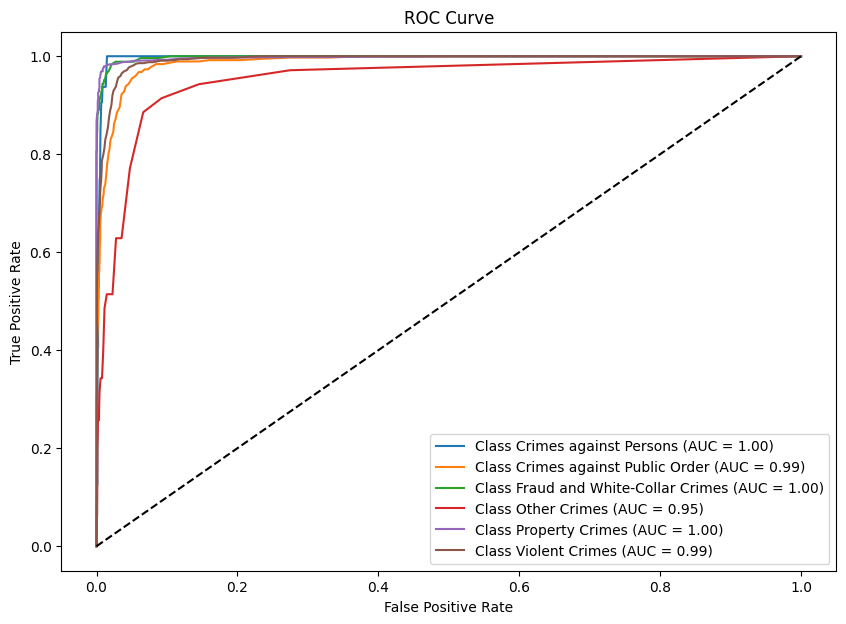

In [ ]:
y_v_binarized = label_binarize(y_v, classes = range(len(target_encoder.classes_)))
y_p1_proba = base_model.predict_proba(x_v)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(target_encoder.classes_)):
  fpr[i], tpr[i], _ = roc_curve(y_v_binarized[:, i], y_p1_proba[:, i])
  roc_auc[i] = roc_auc_score(y_v_binarized[:, i], y_p1_proba[:, i])

plt.figure(figsize = (10,7))
for i in range(len(target_encoder.classes_)):
  plt.plot(fpr[i], tpr[i], label = f'Class {target_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

For now, we will follow the models and ensemble methods suggested to be used by the grading document for this project, along with the appropiate reports and analysis.

***K***-Nearest Neighbors Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_base = KNeighborsClassifier()
knn_base.fit(x_t, y_t)
y_p2 = knn_base.predict(x_v)

acc2 = accuracy_score(y_v, y_p2)
print(f'KNN Classifier Accuracy: {acc2:.4f}')

KNN Classifier Accuracy: 0.6132


In [ ]:
print(classification_report(y_v, y_p2, target_names = target_encoder.classes_))

                               precision    recall  f1-score   support

       Crimes against Persons       0.06      0.03      0.04        32
  Crimes against Public Order       0.25      0.19      0.22       374
Fraud and White-Collar Crimes       0.28      0.26      0.27       267
                 Other Crimes       0.00      0.00      0.00        35
              Property Crimes       0.70      0.86      0.77      2303
               Violent Crimes       0.54      0.32      0.40       989

                     accuracy                           0.61      4000
                    macro avg       0.31      0.28      0.28      4000
                 weighted avg       0.58      0.61      0.58      4000



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
knn_r_cv_dist = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_1 = KNeighborsClassifier()
knn_r_cv = RandomizedSearchCV(knn_1, param_distributions = knn_r_cv_dist, n_iter = 10, cv = 5, scoring = 'accuracy', n_jobs = -1, random_state = 42, verbose = 2)
knn_r_cv.fit(x_t, y_t)

print(f'Best Parameters: {knn_r_cv.best_params_}')
print(f'Best Score: {knn_r_cv.best_score_:.4f}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'weights': 'distance', 'n_neighbors': 27, 'metric': 'manhattan'}
Best Score: 0.6894


In [ ]:
best_knn_model = knn_r_cv.best_estimator_
y_p_best_knn = best_knn_model.predict(x_v)
acc_best_knn = accuracy_score(y_v, y_p_best_knn)
print(f'Best KNN Classifier Accuracy: {acc_best_knn:.4f}')

Best KNN Classifier Accuracy: 0.6913


Support Vector Machine Classification

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_base = SVC(random_state = 42)
svm_base.fit(x_t, y_t)
y_p3 = svm_base.predict(x_v)

acc3 = accuracy_score(y_v, y_p3)
print(f'SVM Classifier Accuracy: {acc3:.4f}')

SVM Classifier Accuracy: 0.5757


The first Model we tried out was the randomforest Classifier as it can handle both cat and num data, robust to overfitting due to its ensemble method, and provides feature importance. This is our best model by far, and is an example of the Bagging technique. Now we will move onto Boosting and MLP before selecting and trying to improve the best performing model.

Bootstrap Aggregation Ensemble Learning

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [ ]:
ada_boost_base = AdaBoostClassifier(random_state = 42)
ada_boost_base.fit(x_t, y_t)
y_ada_base = ada_boost_base.predict(x_v)

acc_ada_base = accuracy_score(y_v, y_ada_base)
print(f'AdaBoost Classifier Accuracy: {acc_ada_base:.4f}')

AdaBoost Classifier Accuracy: 0.8080


In [ ]:
print(classification_report(y_v, y_ada_base, target_names = target_encoder.classes_))

                               precision    recall  f1-score   support

       Crimes against Persons       0.12      0.59      0.20        32
  Crimes against Public Order       0.62      0.50      0.55       374
Fraud and White-Collar Crimes       0.72      0.80      0.76       267
                 Other Crimes       0.00      0.00      0.00        35
              Property Crimes       0.88      0.93      0.91      2303
               Violent Crimes       0.82      0.67      0.74       989

                     accuracy                           0.81      4000
                    macro avg       0.53      0.58      0.53      4000
                 weighted avg       0.82      0.81      0.81      4000



In [ ]:
gradient_boost_base = GradientBoostingClassifier(random_state = 42)
gradient_boost_base.fit(x_t, y_t)
y_gb_base = gradient_boost_base.predict(x_v)

acc_gb_base = accuracy_score(y_v, y_gb_base)
print(f'Gradient Boosting Classifier Accuracy: {acc_gb_base:.4f}')

Gradient Boosting Classifier Accuracy: 0.9383


In [ ]:
print(classification_report(y_v, y_gb_base, target_names = target_encoder.classes_))

                               precision    recall  f1-score   support

       Crimes against Persons       0.49      0.53      0.51        32
  Crimes against Public Order       0.83      0.78      0.80       374
Fraud and White-Collar Crimes       0.93      0.94      0.94       267
                 Other Crimes       0.38      0.17      0.24        35
              Property Crimes       0.98      0.98      0.98      2303
               Violent Crimes       0.90      0.93      0.92       989

                     accuracy                           0.94      4000
                    macro avg       0.75      0.72      0.73      4000
                 weighted avg       0.94      0.94      0.94      4000



In [ ]:
xg_boost = xgb.XGBClassifier(random_state = 42)
xg_boost.fit(x_t, y_t)
y_xg_base = xg_boost.predict(x_v)

acc_xg_base = accuracy_score(y_v, y_xg_base)
print(f'XGBoost Classifier Accuracy: {acc_xg_base:.4f}')

XGBoost Classifier Accuracy: 0.9523


In [ ]:
print(classification_report(y_v, y_xg_base, target_names = target_encoder.classes_))

                               precision    recall  f1-score   support

       Crimes against Persons       0.71      0.75      0.73        32
  Crimes against Public Order       0.83      0.86      0.84       374
Fraud and White-Collar Crimes       0.96      0.93      0.94       267
                 Other Crimes       0.46      0.17      0.25        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.93      0.95      0.94       989

                     accuracy                           0.95      4000
                    macro avg       0.81      0.77      0.78      4000
                 weighted avg       0.95      0.95      0.95      4000



Since the training score of Gradient and XGBoost was at the same level as the base random forest classifier submitted, I will submit the test set predictions of both these models, and depending on their performances, create a suitable ensemble model

In [ ]:
y_gb_base_t = gradient_boost_base.predict(test_e)

In [ ]:
#Downloading Gradient Predictions
d_y_gb_base = target_encoder.inverse_transform(y_gb_base_t)
print(d_y_gb_base[:10])

['Violent Crimes' 'Property Crimes' 'Fraud and White-Collar Crimes'
 'Property Crimes' 'Crimes against Public Order' 'Violent Crimes'
 'Violent Crimes' 'Violent Crimes' 'Property Crimes' 'Violent Crimes']


In [ ]:
gradient_boost_file = pd.DataFrame({'Crime_Category': d_y_gb_base})
gradient_boost_file['ID'] = range(1, len(gradient_boost_file) + 1)
gradient_boost_file.to_csv('gradient_boost_file.csv', index = False)

In [ ]:
y_xg_base_t = xg_boost.predict(test_e)

In [ ]:
#Downloading Xgb Predictions
d_y_xg_base = target_encoder.inverse_transform(y_xg_base_t)
print(d_y_xg_base[:10])

['Violent Crimes' 'Property Crimes' 'Fraud and White-Collar Crimes'
 'Property Crimes' 'Crimes against Public Order' 'Violent Crimes'
 'Violent Crimes' 'Violent Crimes' 'Property Crimes' 'Violent Crimes']


In [ ]:
xg_boost_file = pd.DataFrame({'Crime_Category': d_y_xg_base})
xg_boost_file['ID'] = range(1, len(xg_boost_file) + 1)
xg_boost_file.to_csv('xg_boost_file.csv', index = False)

> GradientBoost = 0.93740

> XGBoost = 0.94760


Boosting Ensemble Learning

> Stacking

We will combine the predictions Gradient Boosting and XGBoost, and train a random forest classifier as the meta model for this dataset.

In [ ]:
y_train_ada = ada_boost_base.predict(x_t)
y_train_gb = gradient_boost_base.predict(x_t)
y_train_xg = xg_boost.predict(x_t)

In [ ]:
y_ada_base_t = ada_boost_base.predict(test_e)

In [ ]:
stack_features_train = pd.DataFrame({
    'Gradient_Boosting': y_train_gb,
    'XGBoost': y_train_xg
})

stack_features_validation = pd.DataFrame({
    'Gradient_Boosting': y_gb_base,
    'XGBoost': y_xg_base
})
stack_features_test = pd.DataFrame({
    'Gradient_Boosting': y_gb_base_t,
    'XGBoost': y_xg_base_t
})

meta_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
meta_model.fit(stack_features_train, y_t)

y_meta_model_train = meta_model.predict(stack_features_validation)
training_accuracy_meta = accuracy_score(y_v, y_meta_model_train)
print(f'Training accuracy of the meta-model: {training_accuracy_meta}')

Training accuracy of the meta-model: 0.95225


In [ ]:
print(classification_report(y_v, y_meta_model_train, target_names = target_encoder.classes_))

                               precision    recall  f1-score   support

       Crimes against Persons       0.71      0.75      0.73        32
  Crimes against Public Order       0.83      0.86      0.84       374
Fraud and White-Collar Crimes       0.96      0.93      0.94       267
                 Other Crimes       0.46      0.17      0.25        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.93      0.95      0.94       989

                     accuracy                           0.95      4000
                    macro avg       0.81      0.77      0.78      4000
                 weighted avg       0.95      0.95      0.95      4000



In [ ]:
#Downloading Meta Predictions
y_meta_t = meta_model.predict(stack_features_test)

d_y_meta = target_encoder.inverse_transform(y_meta_t)
print(d_y_meta[:10])

meta_file = pd.DataFrame({'Crime_Category': d_y_meta})
meta_file['ID'] = range(1, len(meta_file) + 1)
meta_file.to_csv('meta_file.csv', index = False)

['Violent Crimes' 'Property Crimes' 'Fraud and White-Collar Crimes'
 'Property Crimes' 'Crimes against Public Order' 'Violent Crimes'
 'Violent Crimes' 'Violent Crimes' 'Property Crimes' 'Violent Crimes']


> Multi Layer Perceprton

Trying the last predefined model in the guidelines before working on optimizing current model performances

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), max_iter = 300, solver = 'adam', random_state = 42)
mlp_model.fit(x_t, y_t)
y_mlp_base = mlp_model.predict(x_v)

acc_mlp_base = accuracy_score(y_v, y_mlp_base)
print(f'MLP Classifier Accuracy: {acc_mlp_base:.4f}')

MLP Classifier Accuracy: 0.9307


In [ ]:
print(classification_report(y_v, y_mlp_base, target_names = target_encoder.classes_))

                               precision    recall  f1-score   support

       Crimes against Persons       0.50      0.34      0.41        32
  Crimes against Public Order       0.83      0.79      0.81       374
Fraud and White-Collar Crimes       0.90      0.92      0.91       267
                 Other Crimes       0.75      0.34      0.47        35
              Property Crimes       0.95      0.99      0.97      2303
               Violent Crimes       0.94      0.89      0.91       989

                     accuracy                           0.93      4000
                    macro avg       0.81      0.71      0.75      4000
                 weighted avg       0.93      0.93      0.93      4000



Till now we have tried a variety of models using our training data and achieved our highest test score of 0.94760 and are currently 121st on the leaderboard. We have finished everything required for project submission and will be working to improve the score from now.

1. we will try a few more diverse models and create a meta model with the best scorers, with NN as the base model, as it can capture complex relations
2. Perform feature engineering (Polynomial features + PCA) if required
3. Use stratified K fold to balance classes
4. Use SMOTE to help with class imbalance (if it is allowed)
5. Create an ensemble of ensemblies (crude, endgame)

In [ ]:
#Using LGBM to create a catboost model
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
lbgm_base = LGBMClassifier(random_state = 42)
lbgm_base.fit(x_t, y_t)
y_lbgm_base = lbgm_base.predict(x_v)

acc_lbgm_base = accuracy_score(y_v, y_lbgm_base)
print(f'LGBM Classifier Accuracy: {acc_lbgm_base:.4f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 183
[LightGBM] [Info] Start training from score -4.417654
[LightGBM] [Info] Start training from score -2.412121
[LightGBM] [Info] Start training from score -2.688248
[LightGBM] [Info] Start training from score -4.710531
[LightGBM] [Info] Start training from score -0.535823
[LightGBM] [Info] Start training from score -1.443394
LGBM Classifier Accuracy: 0.9503


In [ ]:
print(classification_report(y_v, y_lbgm_base, target_names = target_encoder.classes_))

                               precision    recall  f1-score   support

       Crimes against Persons       0.70      0.66      0.68        32
  Crimes against Public Order       0.80      0.85      0.82       374
Fraud and White-Collar Crimes       0.96      0.92      0.94       267
                 Other Crimes       0.38      0.14      0.21        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.94      0.95      0.94       989

                     accuracy                           0.95      4000
                    macro avg       0.79      0.75      0.76      4000
                 weighted avg       0.95      0.95      0.95      4000



In [ ]:
y_lbgm_base_t = lbgm_base.predict(test_e)

In [ ]:
d_y_lbgm_base = target_encoder.inverse_transform(y_lbgm_base_t)
print(d_y_lbgm_base[:10])

['Violent Crimes' 'Property Crimes' 'Fraud and White-Collar Crimes'
 'Property Crimes' 'Crimes against Public Order' 'Violent Crimes'
 'Violent Crimes' 'Violent Crimes' 'Property Crimes' 'Violent Crimes']


In [ ]:
lbgm_file = pd.DataFrame({'Crime_Category': d_y_lbgm_base})
lbgm_file['ID'] = range(1, len(lbgm_file) + 1)
lbgm_file.to_csv('lbgm_file_.csv', index = False)

Since a few models performed at the highest level, lets try a new meta model with them. namely
> RandomForestClassifier, XGBoost, MultiLayerPerceptron and LightGBM

In [ ]:
# generate training set predictions
y_train_xg = xg_boost.predict(x_t)
y_train_mlp = mlp_model.predict(x_t)
y_train_lbgm = lbgm_base.predict(x_t)
y_train_rfc = base_model.predict(x_t)

# generate validation set predictions
y_val_xg = xg_boost.predict(x_v)
y_val_mlp = mlp_model.predict(x_v)
y_val_lbgm = lbgm_base.predict(x_v)
y_val_rfc = base_model.predict(x_v)

# generate test set predictions
y_test_xg = xg_boost.predict(test_e)
y_test_mlp = mlp_model.predict(test_e)
y_test_lbgm = lbgm_base.predict(test_e)
y_test_rfc = base_model.predict(test_e)

In [ ]:
meta_features_train = pd.DataFrame({
    'RFC': y_train_rfc,
    'XGBoost': y_train_xg,
    'MLP': y_train_mlp,
    'LightGBM': y_train_lbgm
})

meta_features_val = pd.DataFrame({
    'RFC': y_val_rfc,
    'XGBoost': y_val_xg,
    'MLP': y_val_mlp,
    'LightGBM': y_val_lbgm
})

meta_features_test = pd.DataFrame({
    'RFC': y_test_rfc,
    'XGBoost': y_test_xg,
    'MLP': y_test_mlp,
    'LightGBM': y_test_lbgm
})

In [ ]:
rfc_meta_model = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc_meta_model.fit(meta_features_train, y_t)

RandomForestClassifier(random_state=42)

In [ ]:
mlp_meta_model = MLPClassifier(hidden_layer_sizes = (100,), max_iter = 300, solver = 'adam', random_state = 42)
mlp_meta_model.fit(meta_features_train, y_t)

MLPClassifier(max_iter=300, random_state=42)

In [ ]:
y_rfc_meta = rfc_meta_model.predict(meta_features_val)
acc_rfc_meta = accuracy_score(y_v, y_rfc_meta)

print(f'RFC Meta Model Accuracy: {acc_rfc_meta:.4f}')

RFC Meta Model Accuracy: 0.9425


In [ ]:
y_mlp_meta = mlp_meta_model.predict(meta_features_val)
acc_mlp_meta = accuracy_score(y_v, y_mlp_meta)

print(f'MLP Meta Model Accuracy: {acc_mlp_meta:.4f}')

MLP Meta Model Accuracy: 0.9407


The Light Gradient Boosting Algorithm perfomed the best yet, yielding a test score of 0.9508. Hence, let us try to tune the model into its best possible version. The plan
- Random Search to identify key areas of best parameters
- Refine key areas with grid search
- use k-fold cross validation to balance classes
- monitor overfitting + iterative tuning

In [ ]:
from scipy.stats import randint, uniform

In [ ]:
lgbm_param_dist = {
    'learning_rate': uniform(0.01, 0.19),
    'n_estimators': randint(50, 1001),
    'num_leaves': randint(20, 61),
    'max_depth': randint(-1, 16),
    'bagging_fraction': uniform(0.6, 0.4),
    'lambda_l2': uniform(0, 1)
}

lbgm_cv_base = LGBMClassifier(random_state = 42)

In [ ]:
lbgm_random_cv = RandomizedSearchCV(lbgm_cv_base, param_distributions = lgbm_param_dist, n_iter = 20, cv = 10, scoring = 'accuracy', n_jobs = -1, random_state = 42, verbose = 2)
lbgm_random_cv.fit(x_t, y_t)

print(f'Best Parameters: {lbgm_random_cv.best_params_}')
print(f'Best Score: {lbgm_random_cv.best_score_:.4f}')

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[LightGBM] [Warning] lambda_l2 is set=0.11089082081183133, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11089082081183133
[LightGBM] [Warning] bagging_fraction is set=0.8842651558743149, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8842651558743149
[LightGBM] [Warning] lambda_l2 is set=0.11089082081183133, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11089082081183133
[LightGBM] [Warning] bagging_fraction is set=0.8842651558743149, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8842651558743149
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 183
[LightGBM] [Info]

In [ ]:
from sklearn.model_selection import GridSearchCV
best_params_random_lgbm = lbgm_random_cv.best_params_

In [ ]:
gcv_param_grid = {
    'learning_rate': [best_params_random_lgbm['learning_rate']*0.5, best_params_random_lgbm['learning_rate'], best_params_random_lgbm['learning_rate']*1.5],
    'n_estimators': [best_params_random_lgbm['n_estimators']-100, best_params_random_lgbm['n_estimators'], best_params_random_lgbm['n_estimators']+100],
    'num_leaves': [best_params_random_lgbm['num_leaves']-10, best_params_random_lgbm['num_leaves'], best_params_random_lgbm['num_leaves']+10],
    'max_depth': [best_params_random_lgbm['max_depth']-2, best_params_random_lgbm['max_depth'], best_params_random_lgbm['max_depth']+2]
}

lgbm_g = LGBMClassifier(random_state=42)

lgbm_gcv = GridSearchCV( lgbm_g, param_grid = gcv_param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 2)

lgbm_gcv.fit(x_t, y_t)

best_params_lgbm_gcv = lgbm_gcv.best_params_
print(f'Best parameters from grid search: {best_params_lgbm_gcv}')


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 183
[LightGBM] [Info] Start training from score -4.417654
[LightGBM] [Info] Start training from score -2.412121
[LightGBM] [Info] Start training from score -2.688248
[LightGBM] [Info] Start training from score -4.710531
[LightGBM] [Info] Start training from score -0.535823
[LightGBM] [Info] Start training from score -1.443394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [ ]:
print(f'Best Score: {lgbm_gcv.best_score_:.4f}')

Best Score: 0.9511


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
best_lgbm_model = LGBMClassifier(**best_params_lgbm_gcv, random_state=42)
gcv_scores = cross_val_score(best_lgbm_model, x_t, y_t, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {gcv_scores}')
print(f'Mean cross-validation score: {gcv_scores.mean()}')

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

Since the tuned model has a promising CV score, lets check the test score

In [ ]:
best_lgbm_model.fit(x_t, y_t)
y_b_lbgm = best_lgbm_model.predict(x_v)

acc_b_lbgm = accuracy_score(y_v, y_b_lbgm)
print(f'Best LGBM Classifier Accuracy: {acc_b_lbgm:.4f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1209
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 183
[LightGBM] [Info] Start training from score -4.417654
[LightGBM] [Info] Start training from score -2.412121
[LightGBM] [Info] Start training from score -2.688248
[LightGBM] [Info] Start training from score -4.710531
[LightGBM] [Info] Start training from score -0.535823
[LightGBM] [Info] Start training from score -1.443394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

In [ ]:
print(classification_report(y_v, y_b_lbgm, target_names = target_encoder.classes_))

                               precision    recall  f1-score   support

       Crimes against Persons       0.76      0.78      0.77        32
  Crimes against Public Order       0.82      0.87      0.84       374
Fraud and White-Collar Crimes       0.96      0.92      0.94       267
                 Other Crimes       0.40      0.17      0.24        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.94      0.95      0.95       989

                     accuracy                           0.95      4000
                    macro avg       0.81      0.78      0.79      4000
                 weighted avg       0.95      0.95      0.95      4000



In [ ]:
#Downloading LGBM scores
y_b_lbgm_t = best_lgbm_model.predict(test_e)

d_y_b_lbgm_t = target_encoder.inverse_transform(y_b_lbgm_t)
print(d_y_b_lbgm_t[:10])

b_lgbm_file = pd.DataFrame({'Crime_Category': d_y_b_lbgm_t})
b_lgbm_file['ID'] = range(1, len(b_lgbm_file) + 1)
b_lgbm_file.to_csv('b_lgbm_file_mms.csv', index = False)

['Violent Crimes' 'Property Crimes' 'Fraud and White-Collar Crimes'
 'Property Crimes' 'Crimes against Public Order' 'Violent Crimes'
 'Violent Crimes' 'Violent Crimes' 'Property Crimes' 'Violent Crimes']


Since the training score after initial tuning seems to be lesser than the base model, we can attribute this to overfitting and make some changes before we move ahead.

In [ ]:
r_cv_results = pd.DataFrame(lbgm_random_cv.cv_results_)
print(r_cv_results[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score', ascending=False).head(10))

    mean_test_score  std_test_score  \
18         0.951313        0.004225   
0          0.951063        0.004473   
11         0.951000        0.003793   
7          0.951000        0.003915   
6          0.950687        0.004074   
4          0.950625        0.004079   
3          0.950500        0.004319   
1          0.950313        0.004851   
12         0.949687        0.003593   
16         0.949375        0.004239   

                                               params  
18  {'bagging_fraction': 0.8842651558743149, 'lamb...  
0   {'bagging_fraction': 0.749816047538945, 'lambd...  
11  {'bagging_fraction': 0.7427013306774357, 'lamb...  
7   {'bagging_fraction': 0.6137554084460873, 'lamb...  
6   {'bagging_fraction': 0.9233589392465844, 'lamb...  
4   {'bagging_fraction': 0.9895022075365837, 'lamb...  
3   {'bagging_fraction': 0.8469926038510867, 'lamb...  
1   {'bagging_fraction': 0.6399899663272012, 'lamb...  
12  {'bagging_fraction': 0.6661067756252009, 'lamb...  
16  {'bagg

Since we can see an almost consistent pattern of similar variation of scores in different class predictions across all models, we can attribute this to the varied frequency of occurences of the classes in the dataset. To address this bias in data, we will use SMOTE to create synthetic samples for the minority classes.

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [ ]:
# base_model
smote = SMOTE(random_state = 42)
smote_base_model = RandomForestClassifier(random_state = 42)

base_pipeline = ImbPipeline([
    ('smote', smote),
    ('model', smote_base_model)
])

base_pipeline.fit(x_t, y_t)
y_base_smote = base_pipeline.predict(x_v)

acc_base_smote = accuracy_score(y_v, y_base_smote)
print(f'Base SMOTE Model Accuracy: {acc_base_smote:.4f}')

Base SMOTE Model Accuracy: 0.9413


In [ ]:
# xg_boost
smote_xg_boost = xgb.XGBClassifier(random_state = 42)

xg_boost_pipeline = ImbPipeline([
    ('smote', smote),
    ('model', smote_xg_boost)
])

xg_boost_pipeline.fit(x_t, y_t)
y_xg_smote = xg_boost_pipeline.predict(x_v)

acc_xg_boost_smote = accuracy_score(y_v, y_xg_smote)
print(f'XGBoost SMOTE Model Accuracy: {acc_xg_boost_smote:.4f}')

XGBoost SMOTE Model Accuracy: 0.9497


In [ ]:
# mlp_model
mlp_pipeline = ImbPipeline([
    ('smote', smote),
    ('model', mlp_model)
])

mlp_pipeline.fit(x_t, y_t)
y_mlp_smote = mlp_pipeline.predict(x_v)

acc_mlp_smote = accuracy_score(y_v, y_mlp_smote)
print(f'XGBoost SMOTE Model Accuracy: {acc_mlp_smote:.4f}')

XGBoost SMOTE Model Accuracy: 0.9227


In [ ]:
# lgbm_model
lgbm_pipeline = ImbPipeline([
    ('smote', smote),
    ('model', best_lgbm_model)
])

lgbm_pipeline.fit(x_t, y_t)
y_lgbm_smote = lgbm_pipeline.predict(x_v)

acc_lgbm_smote = accuracy_score(y_v, y_lgbm_smote)
print(f'XGBoost SMOTE Model Accuracy: {acc_lgbm_smote:.4f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.194357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 35151
[LightGBM] [Info] Number of data points in the train set: 56178, number of used features: 293
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [ ]:
#downloading lgbm_pipeline predictions
y_p_lbgm_t = lgbm_pipeline.predict(test_e)

d_y_p_lbgm_t = target_encoder.inverse_transform(y_p_lbgm_t)
print(d_y_p_lbgm_t[:10])

p_lgbm_file = pd.DataFrame({'Crime_Category': d_y_p_lbgm_t})
p_lgbm_file['ID'] = range(1, len(p_lgbm_file) + 1)
p_lgbm_file.to_csv('p_lgbm_file_mms.csv', index = False)

['Violent Crimes' 'Property Crimes' 'Fraud and White-Collar Crimes'
 'Property Crimes' 'Crimes against Public Order' 'Violent Crimes'
 'Violent Crimes' 'Violent Crimes' 'Property Crimes' 'Violent Crimes']


In [ ]:
d_y_t = target_encoder.inverse_transform(y_v)
v, c = np.unique(d_y_t, return_counts = True)
t_c = np.sum(c)

for v, c in zip(v, c):
  r = c / t_c
  print(f'{v}: {r:.2f}')

Crimes against Persons: 0.01
Crimes against Public Order: 0.09
Fraud and White-Collar Crimes: 0.07
Other Crimes: 0.01
Property Crimes: 0.58
Violent Crimes: 0.25


In [ ]:
v, c = np.unique(d_y_b_lbgm_t, return_counts = True)
t_c = np.sum(c)

for v, c in zip(v, c):
  r = c / t_c
  print(f'{v}: {r:.2f}')

Crimes against Persons: 0.01
Crimes against Public Order: 0.09
Fraud and White-Collar Crimes: 0.07
Other Crimes: 0.00
Property Crimes: 0.59
Violent Crimes: 0.24


In [ ]:
x_ts, y_ts = smote.fit_resample(x_t, y_t)

In [ ]:
best_lgbm_model.fit(x_ts, y_ts)
y_b_lbgm_smote = best_lgbm_model.predict(x_v)

acc_b_lbgm_smote = accuracy_score(y_v, y_b_lbgm_smote)
print(f'Best LGBM Classifier Accuracy: {acc_b_lbgm_smote:.4f}')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.174594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 35151
[LightGBM] [Info] Number of data points in the train set: 56178, number of used features: 293
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Info] Start training from score -1.791759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [ ]:
print(classification_report(y_v, y_b_lbgm_smote, target_names = target_encoder.classes_))

                               precision    recall  f1-score   support

       Crimes against Persons       0.61      0.62      0.62        32
  Crimes against Public Order       0.83      0.87      0.85       374
Fraud and White-Collar Crimes       0.97      0.93      0.95       267
                 Other Crimes       0.50      0.31      0.39        35
              Property Crimes       0.99      0.99      0.99      2303
               Violent Crimes       0.94      0.94      0.94       989

                     accuracy                           0.95      4000
                    macro avg       0.80      0.78      0.79      4000
                 weighted avg       0.95      0.95      0.95      4000



> Add proper analysis graphs and charts for all viable models